In [3]:
"""
Inference using saved model
"""

import tensorflow as tf
import os

root = '.'
work_dir = os.path.join(root, 'generated', 'create_sample_extractor3_1')

In [29]:
"""
Helper function
"""

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

ALPHABET_DICT = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
NUMBER_DICT = " 01234567890"

def logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = ALPHABET_DICT[s1_1] + ALPHABET_DICT[s1_2]
    s2 = NUMBER_DICT[s2_1] + NUMBER_DICT[s2_2] + NUMBER_DICT[s2_3] + NUMBER_DICT[s2_4]
    s3 = ALPHABET_DICT[s3_1] + ALPHABET_DICT[s3_2] + ALPHABET_DICT[s3_3]
    output = s1+s2+s3
    return output.replace(' ', '')

dim = (200, 61)
def image_resizer(im, dim=dim):
    image = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    return image

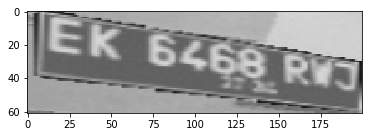

In [38]:
"""
Load single image and do inference using it
"""
import cv2 as cv2
from matplotlib import pyplot as plt

input_image = cv2.imread(os.path.join(work_dir, 'train_dataset', '121.jpg'))
input_image = cv2.resize(input_image, (200, 61), interpolation=cv2.INTER_LINEAR)
plt.imshow(input_image)
plt.show()
input_image = image_resizer(input_image)
input_image = np.expand_dims(input_image, 0)

In [41]:
"""
Load savedModel then run single inference
"""
import numpy as np
from tensorflow.python import summary 
with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.SERVING], os.path.join(work_dir, 'graphdef0', '1546137067'))
    output = sess.graph.get_tensor_by_name('concatenate_7/concat:0')
    result = sess.run(output, feed_dict={'input_3:0': input_image})
    summary.FileWriter(os.path.join(work_dir, 'graphdef0', 'tensorboard')).add_graph(sess.graph)
    
    print(logits_decoder(result[0]))


INFO:tensorflow:Restoring parameters from ./generated/create_sample_extractor3_1/graphdef0/1546137067/variables/variables


EK6468RWJ


In [39]:
from tensorflow.python.tools import import_pb_to_tensorboard
import_pb_to_tensorboard(os.path.join(work_dir, 'graphdef0', '1546137067'), os.path.join(work_dir, 'graphdef0'))

RuntimeError: Attempted to use a closed Session.